## Neural Network Prediction of Sea Level Rise Based on Greenhouse Gas Emissions

* **Course:** Foundations of Machine Learning: Theory and Practice (SoSe 2025)
* **Instructor:** Prof. Dr. Elia Bruni
* **Students:**
    * Johanna Pilz - 985733
    * Martin Iribarren Tortone - 1011094
* **Submission Date:** 22.08.2025


## 1. Introduction

Global sea level rise is one of the most significant consequences of climate change, posing a critical threat to coastal communities and ecosystems worldwide. As illustrated in figure below, the primary driver of this rise is the increasing concentration of greenhouse gases (GHGs) in the atmosphere, resulting from human activities. These gases trap heat, warming the planet and causing both thermal expansion of ocean water and the melting of land ice and glaciers.

This project explores the relationship between GHG emissions and sea level change using machine learning techniques. We aim to develop a simple predictive model capable of forecasting future sea level rise based on different GHG emission scenarios.

## 2. Data exploration

The first step in this project involved a comprehensive search for available datasets pertaining to historical greenhouse gas emissions, future emission predictions, and past sea level rise observations. This exploration led to the compilation of multiple data sources, requiring the consideration of time resolutions and potential inconsistencies to create a cohesive dataset suitable for machine learning analysis.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Past Greenhouse Gas emissions and Predictions

##### Source: PCC, 2024. IPCC AR6 Synthesis Report LR Figure 2.5 (a): Global GHG emissions of modelled pathways. Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/gadr-8q65   Titel anhand dieser DOI in Citavi-Projekt übernehmen. Accessed DAY MONTH YEAR

In [139]:
# Read the data file
df_pred_raw = pd.read_excel("../data/AR6-SYR-LR-F2-5-Panel(a).xlsx", sheet_name="Data")

# Transform the data frame
df_pred = df_pred_raw.drop([1,2,3,4,6,7,8,10,11,13,14,16])
df_pred = df_pred.drop(['Unnamed: 1',2019], axis=1)
years_past = np.array(df_pred.columns[1:7])
years_pred = np.array(df_pred.columns[6:])

# Extract the past emisission and different future scenarios
GHG_past = df_pred.iloc[[0]].values[0,1:7]
GHG_pred_trend = df_pred.iloc[[1]].values[0,6:]
GHG_pred_15_over = df_pred.iloc[[2]].values[0,6:]
GHG_pred_2 = df_pred.iloc[[3]].values[0,6:]
GHG_pred_15 = df_pred.iloc[[4]].values[0,6:]

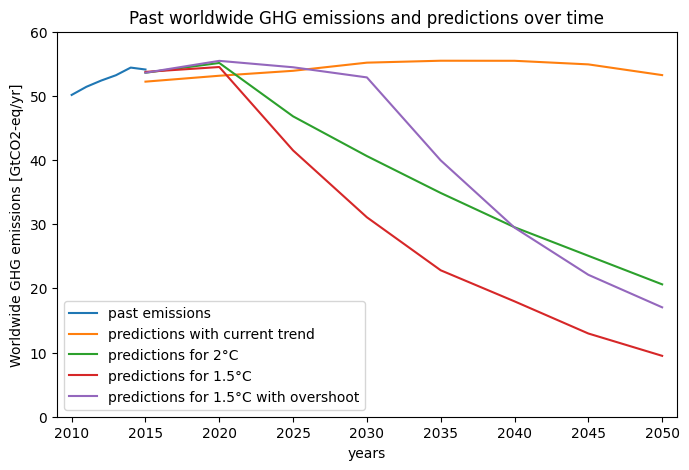

In [140]:
# Plot Past GHG emissions and predictions
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(years_past,GHG_past, label = "past emissions")
ax1.plot(years_pred,GHG_pred_trend, label = "predictions with current trend")
ax1.plot(years_pred,GHG_pred_2, label = "predictions for 2°C")
ax1.plot(years_pred,GHG_pred_15, label = "predictions for 1.5°C")
ax1.plot(years_pred,GHG_pred_15_over, label = "predictions for 1.5°C with overshoot")
ax1.set_title(r'Past worldwide GHG emissions and predictions over time')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
ax1.axis([2009, 2051, 0, 60])
fig.savefig('../images/data_projections.png')

### Past Greenhouse Gas Emissions

##### Source 1: The first source is included in the data for the predictions of different greenhouse gas scenarios (see above).

##### Source 2: IPCC, 2025. IPCC AR6 Synthesis Report LR Figure 2.2 (c): Global net anthropogenic GHG emissions by region (1990-2019). Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/486h-bt03  Titel anhand dieser DOI in Citavi-Projekt übernehmen. Accessed DAY MONTH YEAR.

In [141]:
# Read the data file
df_past_GHG = pd.read_excel("../data/AR6-SYR-LR-F2-2-Panel(c).xlsx", sheet_name="GHG emisions (GtCO2 eq per yr) ")

# Transform the dataframe
df_past_GHG = df_past_GHG.groupby('Year').sum()
df_past_GHG = df_past_GHG.drop('Region', axis=1)

##### Source 3: Jones, Matthew W.; Peters, Glen P.; Gasser, Thomas; Andrew, Robbie M.; Schwingshackl, Clemens; Gütschow, Johannes et al. (2024): National contributions to climate change due to historical emissions of carbon dioxide, methane and nitrous oxide.

In [142]:
# Fetch the data
df_past_GHG2 = pd.read_csv("https://ourworldindata.org/grapher/total-ghg-emissions.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Transform the dataframe
df_past_GHG2 = df_past_GHG2.loc[df_past_GHG2['Entity'] == 'World']
df_past_GHG2 = df_past_GHG2.drop(['Entity','Code'], axis=1)
df_past_GHG2 = df_past_GHG2.set_index('Year')

# Adjust the emission unit
df_past_GHG2.annual_emissions_ghg_total_co2eq *= 10**(-9)

To establish a robust historical baseline, we evaluated two datasets containing past greenhouse gas (GHG) emissions, assessing the length of time each dataset covers and their consistency. A key aspect of this comparison involved examining the compatibility of each historical dataset with the future emission scenario dataset, specifically focusing on overlapping time periods and consistency in reported emission units.

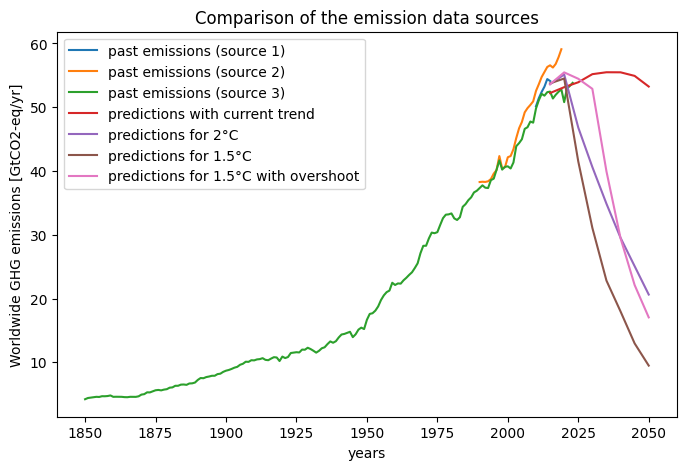

In [143]:
# Comparison of the three emission data sources
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(years_past,GHG_past, label = "past emissions (source 1)")
ax1.plot(df_past_GHG, label = "past emissions (source 2)")
ax1.plot(df_past_GHG2, label = "past emissions (source 3)")
ax1.plot(years_pred,GHG_pred_trend, label = "predictions with current trend")
ax1.plot(years_pred,GHG_pred_2, label = "predictions for 2°C")
ax1.plot(years_pred,GHG_pred_15, label = "predictions for 1.5°C")
ax1.plot(years_pred,GHG_pred_15_over, label = "predictions for 1.5°C with overshoot")
ax1.set_title(r'Comparison of the emission data sources')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
fig.savefig('../images/comparison_past_emissions.png')

The comparison of historical GHG emission data from three sources (as visualized in the figure) reveals a stronger alignment with both historical trends and future emission scenarios derived from Source 1. Furthermore, Source 3 provides a significantly longer historical record of emissions compared to Source 2. Therefore, we will proceed using data from Source 3 for the remainder of the analysis and discontinue use of data from Source 2.

##### Years of overlap: 
To seamlessly combine the historical emission data from Sources 1 and 3, we are identifying the year where the difference between their reported emissions is minimized. This approach aims to find the optimal point to join the datasets, creating a smooth and consistent historical record for our analysis.

In [144]:
print("--------------------------------------------------------------")
print("Years of overlap:")
print("--------------------------------------------------------------")
print(f"{'Year':<15} {'Source 1':<15} {'Source 3':<15} {'Difference':<15}")
print("--------------------------------------------------------------")
for i,y in enumerate(years_past):
    emission3 = df_past_GHG2.loc[[y]].annual_emissions_ghg_total_co2eq.iloc[0]
    print(f"{y:<15} {GHG_past[i]:<15.2f} {emission3:<15.4} {emission3-GHG_past[i]:<15.2}")
print("--------------------------------------------------------------")

--------------------------------------------------------------
Years of overlap:
--------------------------------------------------------------
Year            Source 1        Source 3        Difference     
--------------------------------------------------------------
2010            50.15           49.8            -0.35          
2011            51.42           51.09           -0.33          
2012            52.39           52.09           -0.3           
2013            53.22           51.81           -1.4           
2014            54.41           52.36           -2.1           
2015            54.11           52.44           -1.7           
--------------------------------------------------------------


As shown in the table above, the analysis identified 2012 as the year with the smallest difference in reported emissions between Sources 1 and 3. Consequently, we will construct a combined historical dataset by utilizing data from Source 3 up to and including 2011, and then transitioning to data from Source 1 from 2012 onwards.

In [145]:
# Combine historical data sources
GHG_past_comb = df_past_GHG2.copy()
GHG_past_comb.loc[[2012, 2013, 2014], 'annual_emissions_ghg_total_co2eq'] = [float(emi) for emi in GHG_past[2:5]]
del_years = np.arange(2015,2024)
GHG_past_comb = GHG_past_comb.drop(del_years)

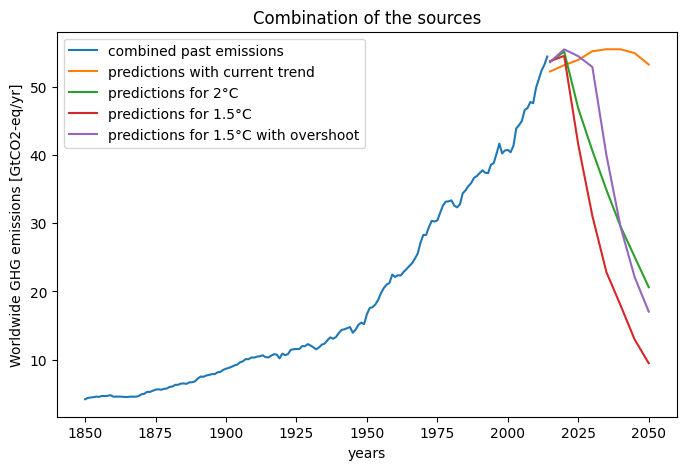

In [146]:
# Plot the combined GHG emissions
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(GHG_past_comb, label = "combined past emissions")
ax1.plot(years_pred,GHG_pred_trend, label = "predictions with current trend")
ax1.plot(years_pred,GHG_pred_2, label = "predictions for 2°C")
ax1.plot(years_pred,GHG_pred_15, label = "predictions for 1.5°C")
ax1.plot(years_pred,GHG_pred_15_over, label = "predictions for 1.5°C with overshoot")
ax1.set_title(r'Combination of the sources')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
fig.savefig('../images/data_combined_emissions.png')

The figure above illustrates our combined dataset of historical and projected GHG emissions. While the historical data is available at yearly intervals, the future emission scenarios are provided only every 5 years. Therefore, during data preparation, the future GHG emission scenarios will be interpolated to match the yearly frequency of the historical data.

### Sea level rise

##### Source: NOAA Climate.gov (2022) Global Sea Level. with  University of Hawaii Fast Delivery sea level data

In [147]:
# Fetch the data
df_sealevel = pd.read_csv("https://ourworldindata.org/grapher/sea-level.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Transform the dataframe
df_sealevel = df_sealevel.drop(['Entity','Code','sea_level_church_and_white_2011','sea_level_average'], axis=1)
df_sealevel = df_sealevel.dropna()
df_sealevel['Day'] = [np.datetime64(day) for day in df_sealevel['Day']]

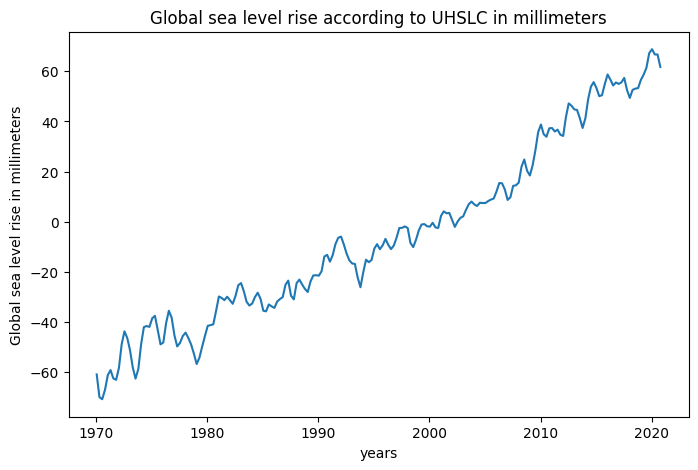

In [148]:
# Plot the Sea level rise
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(df_sealevel['Day'],df_sealevel['sea_level_uhslc'])
ax1.set_title(r'Global sea level rise according to UHSLC in millimeters')
ax1.set_xlabel('years')
ax1.set_ylabel('Global sea level rise in millimeters')
fig.savefig('../images/data_sealevelrise.png')

# 3. Model Training

This notebook includes the training of the sea level prediction models witha baseline linear model and a 2-hidden-layer non-linear model. It performs the following steps:
1. Loads and preprocesses the historical GHG and sea level data.
2. Splits the data into training, validation, and test sets using a **chronological** split, which is appropriate for time-series data.
3. Initializes two models: a baseline linear model and a 2-hidden-layer non-linear model.
4. Trains both models on the training data.
5. Saves the trained model objects to the `../models/` directory for later use in analysis and prediction.

### 3.1 Setup and Data Preparation

In [149]:
# Set random seed for reproducibility
np.random.seed(42)

# Prepare the data for normalization
df_pred = df_pred.rename(columns={'Trend from implemented policies (Lowest bound of  red shading ) ': 'Trend from implemented policies','Limit warming to 2°C (>67%) or return warming to 1.5°C (>50%) after a high overshoot, NDCs until 2030 (Median , dark navy blue line )': 'Limit warming to 2°C or return warming to 1.5°C after a high overshoot', 'Limit warming to 2°C (>67%) (Median , dark green line )': 'Limit warming to 2°C', 'Limit warming to 1.5°C (>50%) with no or limited overshoot ( Median ligh blue line ) ': 'Limit warming to 1.5°C'})
df_sealevel = df_sealevel.groupby(df_sealevel['Day'].dt.year).mean()
df_sealevel = df_sealevel.drop('Day', axis=1, errors='ignore')

# Normalization
GHG_past_norm = (GHG_past_comb - GHG_past_comb.mean()) / GHG_past_comb.std()
sealevel_norm = (df_sealevel - df_sealevel.mean()) / df_sealevel.std()

# Sequence and Splitting
def get_GHG_sequence(n_years, df_GHG, start_year, end_year):
    X, y = list(), list()
    for i in range(start_year, end_year + 1):
        end_ix = i - 1
        start_ix = end_ix - n_years + 1
        seq_x = df_GHG.loc[start_ix:end_ix]
        X.append(seq_x.to_numpy())
        y.append(sealevel_norm.loc[i].values)
    return np.array(X), np.array(y)

timespan = 15
train_end_year = 2000
validation_end_year = 2007
test_end_year = 2014

X_train, y_train = get_GHG_sequence(timespan, GHG_past_norm, 1970, train_end_year)
X_val, y_val = get_GHG_sequence(timespan, GHG_past_norm, train_end_year + 1, validation_end_year)
X_test, y_test = get_GHG_sequence(timespan, GHG_past_norm, validation_end_year + 1, test_end_year)

print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

Training set size: 31
Validation set size: 7
Test set size: 7


### 3.2 Neural Network Model Architectures

In [150]:
import numpy as np
import pickle

class NeuralNetwork_0hl:
    def __init__(self, input_size, output_size, dyn_learningrate=False):
        """
        Initialize the neural network
        """
        self.input_size = input_size
        self.output_size = output_size
        # Random weights and biases
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(output_size)
        self.dyn_learningrate = dyn_learningrate

    def linear(self, x):
        """
        linear activation function
        """
        return x

    def linear_derivative(self, x):
        """
        derivation of linear funktion
        """
        return 1

    def forward(self, input_data):
        """
        Forward Propagation
        """
        self.output = self.linear(np.dot(input_data, self.weights) + self.bias)
        return self.output

    def backward(self, input_data, target):
        """
        Backpropagation
        """
        # Calculate the error
        error = target - self.output

        # Calculate the gradient
        delta = error * self.linear_derivative(self.output)

        # Update weights and bias
        self.weights += self.learning_rate * np.dot(input_data.T, delta)
        self.bias += self.learning_rate * np.sum(delta, axis=0)

    def train(self, input_data, target, epochs, learningrate=0.01, print_output=True):
        """
        Train the network
        """
        self.learning_rate = learningrate
        print_epoch = int(epochs / 20)
        arr_loss = []

        for epoch in range(epochs):
            self.forward(input_data)
            self.backward(input_data, target)
            error = np.mean(np.square(target - self.output))  # Mean Squared Error
            arr_loss.append(error)

            if self.dyn_learningrate:
                if epoch % 100 == 0:
                    self.learning_rate *= 0.9  # Reduce the learning rate every 100 epochs

            if epoch % print_epoch == 0 and print_output:
                print(f"Epoch {epoch + 1}, MSE: {error:.4f}")
            percentage_complete = (epoch / epochs) * 100
            print("Progress: {:.2f}%".format(percentage_complete), end='\r')

        return arr_loss

    def predict(self, input_data):
        """
        Prediction with the trained network
        """
        return self.forward(input_data)

    def save_model(self, file_path):
        """
        Save the trained model to a file.
        """
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(file_path):
        """
        Load a model from a file.
        """
        with open(file_path, 'rb') as f:
            return pickle.load(f)


class NeuralNetwork_2hl:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dyn_learningrate=False):
        """
        Initializes the neural network with two hidden layers.
        """
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.dyn_learningrate = dyn_learningrate

        # Initialize weights and biases randomly
        self.weights1 = np.random.randn(input_size, hidden_size1)
        self.bias1 = np.random.randn(hidden_size1)
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.random.randn(hidden_size2)
        self.weights3 = np.random.randn(hidden_size2, output_size)
        self.bias3 = np.random.randn(output_size)

    def relu(self, x):
        """
        ReLU activation function.
        """
        return np.maximum(0, x)

    def relu_derivative(self, x):
        """
        Derivative of the ReLU function.
        """
        return np.where(x > 0, 1, 0)

    def forward(self, input_data):
        """
        Forward propagation.
        """
        # Layer 1
        self.z1 = np.dot(input_data, self.weights1) + self.bias1
        self.a1 = self.relu(self.z1)

        # Layer 2
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.relu(self.z2)

        # Output Layer
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.output = self.z3  # No activation function on the output layer for regression
        return self.output

    def backward(self, input_data, target):
        """
        Backpropagation.
        """
        # Calculate the error
        error = target - self.output

        # Calculate the delta for the output layer
        delta3 = error * 1 
        
        # Calculate the delta for the second hidden layer
        delta2 = delta3.dot(self.weights3.T) * self.relu_derivative(self.z2)

        # Calculate the delta for the first hidden layer
        delta1 = delta2.dot(self.weights2.T) * self.relu_derivative(self.z1)

        # Update weights and biases
        self.weights3 += self.learning_rate * self.a2.T.dot(delta3)
        self.bias3 += self.learning_rate * np.sum(delta3, axis=0)

        self.weights2 += self.learning_rate * self.a1.T.dot(delta2)
        self.bias2 += self.learning_rate * np.sum(delta2, axis=0)

        self.weights1 += self.learning_rate * input_data.T.dot(delta1)
        self.bias1 += self.learning_rate * np.sum(delta1, axis=0)

    def train(self, input_data, target, epochs, learningrate=0.01, print_output=True):
        """
        Train the network.
        """
        self.learning_rate = learningrate
        print_epoch = int(epochs / 20)
        arr_loss = []

        for epoch in range(epochs):
            self.forward(input_data)
            self.backward(input_data, target)
            
            if self.dyn_learningrate:
                if epoch % 100 == 0:
                    self.learning_rate *= 0.9

            error = np.mean(np.square(target - self.output))  # Mean Squared Error
            arr_loss.append(error)
            if epoch % print_epoch == 0 and print_output:
                print(f"Epoch {epoch + 1}, MSE: {error:.4f}")
            percentage_complete = (epoch / epochs) * 100
            print("Progress: {:.2f}%".format(percentage_complete), end='\r')
        return arr_loss

    def predict(self, input_data):
        """
        Prediction with the trained network.
        """
        return self.forward(input_data)

    def save_model(self, file_path):
        """
        Save the trained model to a file.
        """
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(file_path):
        """
        Load a model from a file.
        """
        with open(file_path, 'rb') as f:
            return pickle.load(f)


class NeuralNetwork_2hl_ridge_early:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dyn_learningrate=False):
        """
        Initializes the neural network with two hidden layers.
        """
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.dyn_learningrate = dyn_learningrate

        # Initialize weights and biases randomly
        self.weights1 = np.random.randn(input_size, hidden_size1)
        self.bias1 = np.random.randn(hidden_size1)
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.random.randn(hidden_size2)
        self.weights3 = np.random.randn(hidden_size2, output_size)
        self.bias3 = np.random.randn(output_size)

        self.best_weights1 = None
        self.best_bias1 = None
        self.best_weights2 = None
        self.best_bias2 = None
        self.best_weights3 = None
        self.best_bias3 = None

    def relu(self, x):
        """
        ReLU activation function.
        """
        return np.maximum(0, x)

    def relu_derivative(self, x):
        """
        Derivative of the ReLU function.
        """
        return np.where(x > 0, 1, 0)

    def forward(self, input_data):
        """
        Forward propagation.
        """
        # Layer 1
        self.z1 = np.dot(input_data, self.weights1) + self.bias1
        self.a1 = self.relu(self.z1)

        # Layer 2
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.relu(self.z2)

        # Output Layer
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.output = self.z3  # No activation function on the output layer for regression
        return self.output

    def backward(self, input_data, target):
        """
        Backpropagation.
        """
        # Calculate the error
        error = target - self.output

        # Calculate the delta for the output layer
        delta3 = error * 1 
        
        # Calculate the delta for the second hidden layer
        delta2 = delta3.dot(self.weights3.T) * self.relu_derivative(self.z2)

        # Calculate the delta for the first hidden layer
        delta1 = delta2.dot(self.weights2.T) * self.relu_derivative(self.z1)

        # Update weights and biases
        self.weights3 += self.learning_rate * (self.a2.T.dot(delta3) - self.l2_lambda * self.weights3)
        self.bias3 += self.learning_rate * np.sum(delta3, axis=0)

        self.weights2 += self.learning_rate * (self.a1.T.dot(delta2) - self.l2_lambda * self.weights2)
        self.bias2 += self.learning_rate * np.sum(delta2, axis=0)

        self.weights1 += self.learning_rate * (input_data.T.dot(delta1) - self.l2_lambda * self.weights1)
        self.bias1 += self.learning_rate * np.sum(delta1, axis=0)

    def train(self, input_data, target, epochs, X_val, y_val, patience, learningrate=0.01, l2_lambda=0.0, print_output=True):
        """
        Train the network with early stopping.
        """
        self.learning_rate = learningrate
        self.l2_lambda = l2_lambda
        print_epoch = int(epochs / 20)
        
        history = {'train_loss': [], 'val_loss': []}
        best_val_loss = float('inf')
        patience_counter = 0

        for epoch in range(epochs):
            # Forward and backward for training data
            output = self.forward(input_data)
            self.backward(input_data, target)
            
            # Calculate training loss
            train_loss = np.mean(np.square(target - output))
            history['train_loss'].append(train_loss)

            # Calculate validation loss
            val_output = self.forward(X_val)
            val_loss = np.mean(np.square(y_val - val_output))
            history['val_loss'].append(val_loss)

            # Early Stopping logic
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                # Save the best model
                self.best_weights1 = self.weights1.copy()
                self.best_bias1 = self.bias1.copy()
                self.best_weights2 = self.weights2.copy()
                self.best_bias2 = self.bias2.copy()
                self.best_weights3 = self.weights3.copy()
                self.best_bias3 = self.bias3.copy()
                patience_counter = 0
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch + 1}. Best validation MSE: {best_val_loss:.4f}')
                # Restore the best model
                self.weights1 = self.best_weights1
                self.bias1 = self.best_bias1
                self.weights2 = self.best_weights2
                self.bias2 = self.best_bias2
                self.weights3 = self.best_weights3
                self.bias3 = self.best_bias3
                return history

            if self.dyn_learningrate:
                if epoch % 100 == 0:
                    self.learning_rate *= 0.9

            if epoch % print_epoch == 0 and print_output:
                print(f"Epoch {epoch + 1}, Train MSE: {train_loss:.4f}, Val MSE: {val_loss:.4f}")
            
            percentage_complete = ((epoch + 1) / epochs) * 100
            print(f"Progress: {percentage_complete:.2f}%", end='\r')

        # Restore the best model if loop completes without early stopping
        if self.best_weights1 is not None:
            self.weights1 = self.best_weights1
            self.bias1 = self.best_bias1
            self.weights2 = self.best_weights2
            self.bias2 = self.best_bias2
            self.weights3 = self.best_weights3
            self.bias3 = self.best_bias3
        
        return history

    def predict(self, input_data):
        """
        Prediction with the trained network.
        """
        return self.forward(input_data)

    def save_model(self, file_path):
        """
        Save the trained model to a file.
        """
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(file_path):
        """
        Load a model from a file.
        """
        with open(file_path, 'rb') as f:
            return pickle.load(f)

### 3.3 Train Baseline Model (Linear)

In [151]:
print('Training Baseline Model')
nn_base = NeuralNetwork_0hl(input_size=timespan, output_size=1)

# Save the model before training
nn_base.save_model('../models/baseline_model_before_training.pkl')
mse_base_train = nn_base.train(np.squeeze(X_train), y_train, epochs=20000, learningrate=0.001, print_output=False)
print('Training complete.')

# Save the model
nn_base.save_model('../models/baseline_model.pkl')
print('Baseline model saved to ../models/baseline_model.pkl')

Training Baseline Model
Training complete.
Baseline model saved to ../models/baseline_model.pkl


### 3.4 Train 2-Hidden-Layer Model (Non-Linear)

In [152]:
print('Training 2-Hidden-Layer Model')
nn_2hl = NeuralNetwork_2hl(input_size=timespan, hidden_size1=8, hidden_size2=4, output_size=1)

# Save the model before training
nn_2hl.save_model('../models/2hl_model_before_training.pkl')
mse_2hl_train = nn_2hl.train(np.squeeze(X_train), y_train, epochs=20000, learningrate=0.001, print_output=False)
print('Training complete.')

# Save the model
nn_2hl.save_model('../models/2hl_model.pkl')
print('2-layer model saved to ../models/2hl_model.pkl')

Training 2-Hidden-Layer Model
Training complete.
2-layer model saved to ../models/2hl_model.pkl


### 3.5 Train 2-Hidden-Layer Model (L2 and Early Stopping)

In [153]:
print('Training 2-Hidden-Layer Ridge Early Stopping Model')
nn_2hl_ridge = NeuralNetwork_2hl_ridge_early(input_size=timespan, hidden_size1=8, hidden_size2=4, output_size=1)

# Save the model before training
nn_2hl_ridge.save_model('../models/2hl_ridge_early_model_before_training.pkl')

# Train the model with the new parameters
history = nn_2hl_ridge.train(
    np.squeeze(X_train),
    y_train,
    X_val=np.squeeze(X_val),
    y_val=y_val,
    epochs=20000,
    learningrate=0.001,
    l2_lambda=0.01,
    patience=200,
    print_output=True
)
print('Training complete')

# Save the trained model
nn_2hl_ridge.save_model('../models/2hl_ridge_early_model.pkl')
print('2-layer ridge early stopping model saved to ../models/2hl_ridge_early_model.pkl')

Training 2-Hidden-Layer Ridge Early Stopping Model
Epoch 1, Train MSE: 1.7766, Val MSE: 0.5474
Early stopping at epoch 364. Best validation MSE: 0.0325
Training complete
2-layer ridge early stopping model saved to ../models/2hl_ridge_early_model.pkl


# 4. Model Analysis and Comparison

This notebook loads the pre-trained models and evaluates their performance on the test set. It performs the following steps:
1. Loads and preprocesses the same historical data to recreate the exact same test set that the models were not trained on.
2. Loads the trained model objects (`baseline_model.pkl` and `2hl_model.pkl`) from the `../models/` directory.
3. Analysis of the influence of hyper parameters (number of epochs, input timespan)
4. Generates predictions from both models on the training, validation, and test sets.
5. Calculates the final Mean Squared Error (MSE) for each model on each dataset.
6. Visualizes the predictions against the actual values and presents a summary table.

### 4.1 Setup and Data Preparation

The following data preparation steps are consistent with those detailed in the model_training notebook.

### 4.2 Load Pre-trained Models

In [154]:
# Load the models from the files
nn_base = NeuralNetwork_0hl.load_model('../models/baseline_model.pkl')
nn_2hl = NeuralNetwork_2hl.load_model('../models/2hl_model.pkl')
nn_2hl_ridge_early = NeuralNetwork_2hl_ridge_early.load_model('../models/2hl_ridge_early_model.pkl')

print('Models loaded successfully.')

Models loaded successfully.


### 4.3 Hyperparameter Optimization

The goal of this analysis is to evaluate how key hyperparameters, specifically the number of epochs and the input timespan, affect the performance of two neural network models. The initial models were trained using a trial-and-error approach, recognizing that the primary objective is to understand model behavior and mitigate overfitting, not to achieve the minimum possible Mean Squared Error (MSE).

To ensure robust results, we averaged the MSE over 100 to 1000 independent training runs for each configuration to minimize the impact of random weight initialization. The analysis focuses on a two-hidden-layer model, which was later enhanced with L2 regularization and early stopping. This work serves as a foundation, justifying the eventual use of more rigorous optimization techniques like random and grid search to find and validate better-performing model architectures.

### 4.4 Experiment with a Dynamic Learning Rate


In [155]:
# Set random seed for reproducibility
np.random.seed(42)

# Create new inputs based on the optimized hyperparameters
X_train_new, y_train_new = get_GHG_sequence(10, GHG_past_norm, 1970, train_end_year)
X_val_new, y_val_new = get_GHG_sequence(10, GHG_past_norm, train_end_year + 1, validation_end_year)
X_test_new, y_test_new = get_GHG_sequence(10, GHG_past_norm, validation_end_year + 1, test_end_year)

# Create two baseline models with the same weights and biases
nn_base_new = NeuralNetwork_0hl(input_size=10, output_size=1, dyn_learningrate=False)
nn_base_dyn_learning = NeuralNetwork_0hl(input_size=10, output_size=1, dyn_learningrate=True)
nn_base_dyn_learning.weights = nn_base_new.weights.copy()
nn_base_dyn_learning.bias = nn_base_new.bias.copy()

# Train both models
mse_train_wo_dyn = nn_base_new.train(np.squeeze(X_train_new), y_train_new.reshape(-1, 1), epochs=35000, learningrate = .001, print_output = False)
mse_train_w_dyn = nn_base_dyn_learning.train(np.squeeze(X_train_new), y_train_new.reshape(-1, 1), epochs=35000, learningrate = .001, print_output = False)

### 4.5 Evaluate Models

In [156]:
# Set random seed for reproducibility
np.random.seed(42)

# Create models with the same initial weights and biases and change the hyperparameters
nn_2hl_new = NeuralNetwork_2hl.load_model('../models/2hl_model_before_training.pkl')
mse_train = nn_2hl_new.train(np.squeeze(X_train), y_train.reshape(-1, 1), epochs=6000, learningrate = .001, print_output = False)

nn_base_new = NeuralNetwork_0hl(input_size=10, output_size=1, dyn_learningrate=False)
mse_train = nn_base_new.train(np.squeeze(X_train_new), y_train_new.reshape(-1, 1), epochs=35000, learningrate = .001, print_output = False)

# Define models and datasets
models_old = {'baseline': nn_base, '2hl': nn_2hl, '2hl_new': nn_2hl_new}
datasets_old = {'train': (X_train, y_train), 'val': (X_val, y_val), 'test': (X_test, y_test)}
models_new = {'baseline_new': nn_base_new}
datasets_new = {'train_new': (X_train_new, y_train_new), 'val_new': (X_val_new, y_val_new), 'test_new': (X_test_new, y_test_new)}

# Generate predictions and calculate MSEs
results = {}
dict_pred = {}

for model_name, model in models_old.items():
    results[model_name] = {}
    for dataset_name, (X, y) in datasets_old.items():
        pred = model.predict(np.squeeze(X))
        if dataset_name == 'test':
            dict_pred[model_name] = pred
        mse = np.mean(np.square(y - pred))
        results[model_name][dataset_name] = mse

for model_name, model in models_new.items():
    results[model_name] = {}
    for dataset_name, (X, y) in datasets_new.items():
        pred = model.predict(np.squeeze(X))
        if dataset_name == 'test_new':
            dict_pred[model_name] = pred
        mse = np.mean(np.square(y - pred))
        results[model_name][dataset_name] = mse

# Print Results
print(f"{'':<25} {'Old hyper parameters':<25} {'New hyper parameters':<25}")
print('--- Baseline Model ---')
print(f"{'Final MSE (Train): ':<25} {results['baseline']['train']:15.4f} {results['baseline_new']['train_new']:25.4f}")
print(f"{'Final MSE (Validation): ':<25} {results['baseline']['val']:15.4f} {results['baseline_new']['val_new']:25.4f}")
print(f"{'Final MSE (Test): ':<25} {results['baseline']['test']:15.4f} {results['baseline_new']['test_new']:25.4f}")
print('--- 2-Layer Model ---')
print(f"{'Final MSE (Train): ':<25} {results['2hl']['train']:15.4f} {results['2hl_new']['train']:25.4f}")
print(f"{'Final MSE (Validation): ':<25} {results['2hl']['val']:15.4f} {results['2hl_new']['val']:25.4f}")
print(f"{'Final MSE (Test): ':<25} {results['2hl']['test']:15.4f} {results['2hl_new']['test']:25.4f}")

                          Old hyper parameters      New hyper parameters     
--- Baseline Model ---
Final MSE (Train):                 0.0134                    0.0142
Final MSE (Validation):            0.0315                    0.0285
Final MSE (Test):                  0.1777                    0.0418
--- 2-Layer Model ---
Final MSE (Train):                 0.0087                    0.0155
Final MSE (Validation):            0.0126                    0.0055
Final MSE (Test):                  0.0444                    0.0778


### 4.6 Comparison and Visualization

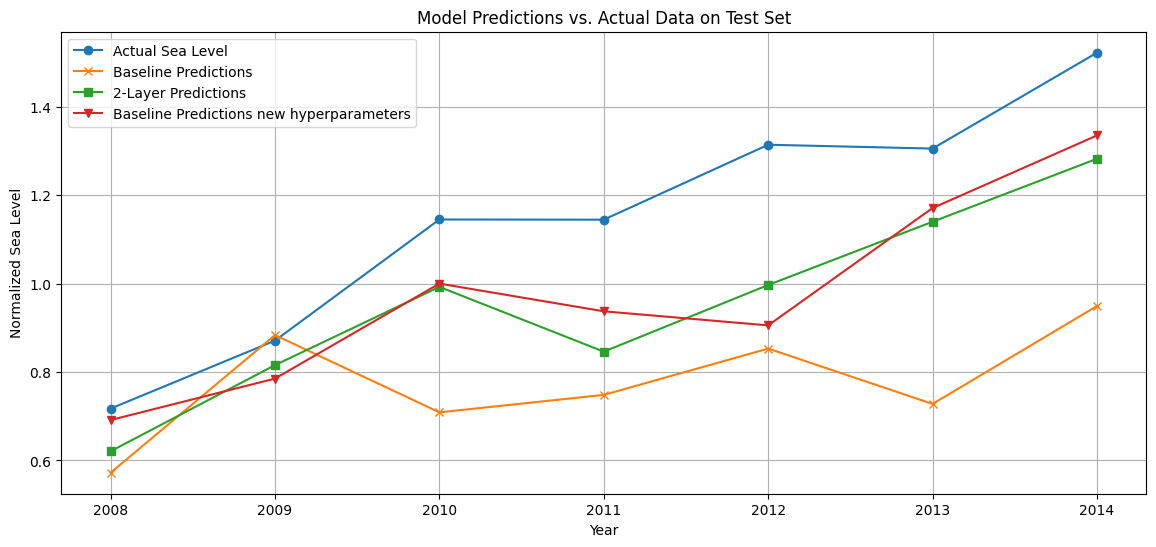

| Model                 |   Train MSE |   Validation MSE |   Test MSE |
|:----------------------|------------:|-----------------:|-----------:|
| Baseline (Linear)     |  0.013378   |       0.0315253  |  0.177703  |
| 2-Hidden-Layer (ReLU) |  0.00868407 |       0.0126038  |  0.0443651 |
| Baseline new hp       |  0.0141812  |       0.0284906  |  0.0417645 |
| 2-Hidden-Layer new hp |  0.0154796  |       0.00550807 |  0.07784   |


In [157]:
# Plotting predictions vs actuals for the test set
plt.figure(figsize=(14, 6))
test_years = np.arange(validation_end_year + 1, test_end_year + 1)
plt.plot(test_years, y_test, label='Actual Sea Level', marker='o')
plt.plot(test_years, dict_pred['baseline'], label='Baseline Predictions', marker='x')
plt.plot(test_years, dict_pred['2hl'], label='2-Layer Predictions', marker='s')
plt.plot(test_years, dict_pred['baseline_new'], label='Baseline Predictions new hyperparameters', marker='v')
plt.title('Model Predictions vs. Actual Data on Test Set')
plt.xlabel('Year')
plt.ylabel('Normalized Sea Level')
plt.legend()
plt.grid(True)
plt.show()

# Results Table
dict_results = {
    'Model': ['Baseline (Linear)', '2-Hidden-Layer (ReLU)', 'Baseline new hp', '2-Hidden-Layer new hp'],
    'Train MSE': [results['baseline']['train'], results['2hl']['train'], results['baseline_new']['train_new'], results['2hl_new']['train']],
    'Validation MSE': [results['baseline']['val'], results['2hl']['val'], results['baseline_new']['val_new'], results['2hl_new']['val']],
    'Test MSE': [results['baseline']['test'], results['2hl']['test'], results['baseline_new']['test_new'], results['2hl_new']['test']]
}

df_results = pd.DataFrame(dict_results)
print(df_results.to_markdown(index=False))

# 5. Future Scenario Analysis

This notebook uses the best-performing model (determined in `02_model_analysis.ipynb`) to predict future sea level rise based on different GHG emission scenarios. It performs the following steps:
1. Loads the future GHG emission scenario data.
2. Loads the chosen, pre-trained model from the `../models/` directory.
3. Prepares the input sequences for the model based on the future scenarios.
4. Generates predictions for sea level rise up to the year 2050 for each scenario.
5. Visualizes the results and presents them in a final summary table.
6. Comparison of our results to the ones from IPCC

In [160]:
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Convert df_pred index to int if no ya lo está
df_pred.index = df_pred.index.astype(int)

# Create continuous yearly data for the GHG scenarios
for year in df_pred.index[:-1]:
    # Solo proceder si 'year+5' existe en el índice
    if year + 5 in df_pred.index:
        diff = df_pred.loc[year + 5] - df_pred.loc[year]
        for i in range(4):
            df_pred.loc[year + i + 1] = df_pred.loc[year] + (i + 1) * diff / 5

df_pred = df_pred.sort_index()

df_pred_mean = df_pred.mean(axis=0)
df_pred_std = df_pred.std(axis=0)

# Store mean/std for denormalization later
ghg_mean = GHG_past_comb.mean().values[0]
ghg_std = GHG_past_comb.std().values[0]
sealevel_mean = df_sealevel.mean().values[0]
sealevel_std = df_sealevel.std().values[0]

# Normalization
GHG_past_norm = (GHG_past_comb - ghg_mean) / ghg_std
GHG_pred_norm = (df_pred - df_pred_mean) / df_pred_std
sealevel_norm = (df_sealevel - sealevel_mean) / sealevel_std

# Sequence for the input
def get_GHG_sequence_X(n_years, df_GHG, start_year, end_year):
    X = list()
    start_ix = start_year - n_years + 1
    for i in range(start_ix, end_year - n_years + 2):
        end_ix = i + n_years - 1
        seq_x = df_GHG.loc[i:end_ix].to_numpy()
        if seq_x.ndim == 1:
            seq_x = seq_x.reshape(-1, 1)
        X.append(seq_x)
    return np.array(X)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

### 5.1 Load Model and Generate Predictions

In [ ]:
# Load the best model
model = NeuralNetwork_2hl.load_model('../models/2hl_model.pkl')

timespan = 15
prediction_years = np.arange(2014, 2051)
results_denorm = {}

for i, scenario in enumerate(GHG_pred_norm.columns):
    # Combine historical data with scenario trends
    arr_GHG_norm = pd.concat([GHG_past_norm['annual_emissions_ghg_total_co2eq'], GHG_pred_norm[scenario]]).sort_index().to_frame()

    # Reindex the DataFrame to ensure all years in the range exist
    full_range = np.arange(arr_GHG_norm.index.min(), 2051 + timespan - 1)
    arr_GHG_norm = arr_GHG_norm.reindex(full_range)
    
    # Create the input sequences from the reindexed data
    x_data_norm = get_GHG_sequence_X(timespan, arr_GHG_norm, 2014, 2050)

    x_data_norm_squeezed = np.squeeze(x_data_norm)

    # Predict the sea level for the scenario
    predictions_norm = model.predict(np.array(x_data_norm_squeezed))

    # Denormalize the predictions
    predictions_denorm = (np.array(predictions_norm) * sealevel_std) + sealevel_mean
    results_denorm[scenario] = predictions_denorm

print('Future predictions generated for all scenarios.')

Future predictions generated for all scenarios.


### 5.2 Visualize and Summarize Results

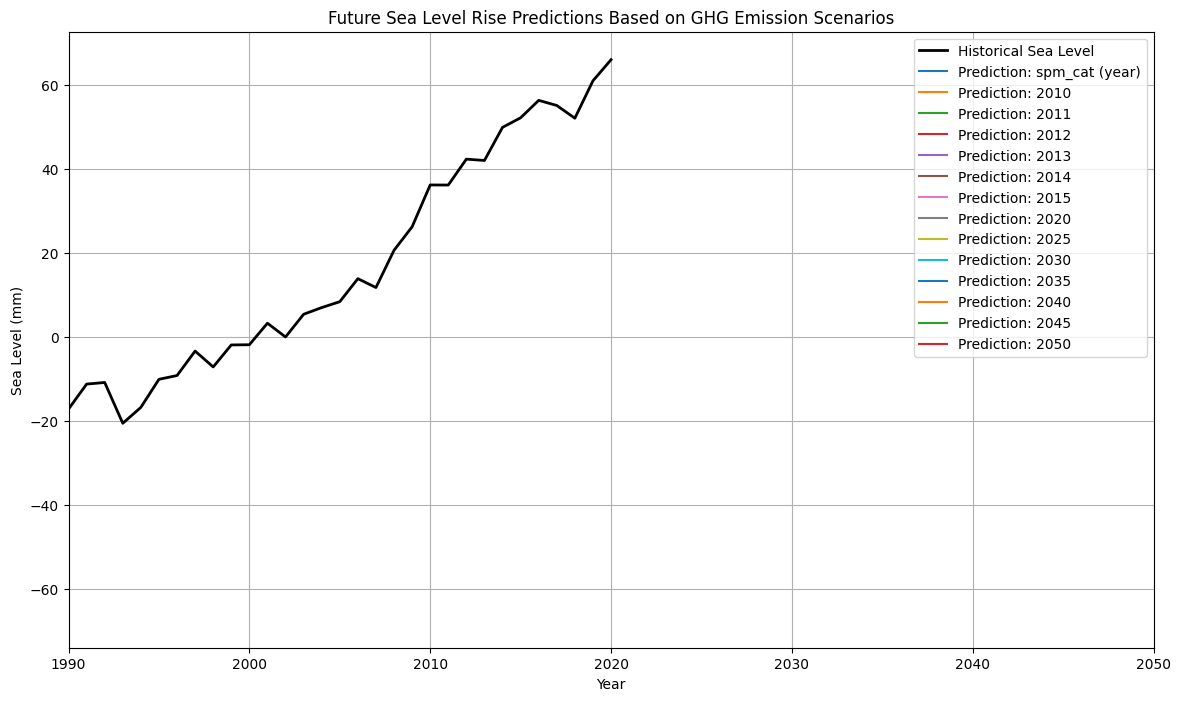

In [159]:
# Plotting the results
plt.figure(figsize=(14, 8))

# Plot historical sea level data
plt.plot(df_sealevel, label='Historical Sea Level', color='black', linewidth=2)

# Plot predictions for each scenario
for scenario, predictions in results_denorm.items():
    plt.plot(prediction_years, predictions, label=f'Prediction: {scenario}')

plt.title('Future Sea Level Rise Predictions Based on GHG Emission Scenarios')
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
plt.legend()
plt.grid(True)
plt.xlim(1990, 2050)
plt.show()



### 5.3 Comparison of our results to the ones from IPCC

Source:

https://d3qt3aobtsas2h.cloudfront.net/edge/ws/search/projection?type=global&data_layer=warming&format=csv

Fox-Kemper, B., H.T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, S.S. Drijfhout, T.L. Edwards, N.R. Golledge, M. Hemer, R.E. Kopp, G. Krinner, A. Mix, D. Notz, S. Nowicki, I.S. Nurhati, L. Ruiz, J.-B. Sallée, A.B.A. Slangen, and Y. Yu, 2021: Ocean, Cryosphere and Sea Level Change. In Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 1211–1362, doi:10.1017/9781009157896.011.

Kopp, R. E., Garner, G. G., Hermans, T. H. J., Jha, S., Kumar, P., Reedy, A., Slangen, A. B. A., Turilli, M., Edwards, T. L., Gregory, J. M., Koubbe, G., Levermann, A., Merzky, A., Nowicki, S., Palmer, M. D., & Smith, C. (2023). The Framework for Assessing Changes To Sea-Level (FACTS) v1.0: A platform for characterizing parametric and structural uncertainty in future global, relative, and extreme sea-level change. Geoscientific Model Development, 16, 7461–7489. https://doi.org/10.5194/gmd-16-7461-2023.

Garner, G. G., T. Hermans, R. E. Kopp, A. B. A. Slangen, T. L. Edwards, A. Levermann, S. Nowikci, M. D. Palmer, C. Smith, B. Fox-Kemper, H. T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, S. S. Drijfhout, T. L. Edwards, N. R. Golledge, M. Hemer, G. Krinner, A. Mix, D. Notz, S. Nowicki, I. S. Nurhati, L. Ruiz, J-B. Sallée, Y. Yu, L. Hua, T. Palmer, B. Pearson, 2021. IPCC AR6 Sea Level Projections. Version 20210809. Dataset accessed [19.08.2025] at https://doi.org/10.5281/zenodo.5914709.

In [ ]:
# Fetch the data
df_sealevel_pred = pd.read_excel("../data/ipcc_ar6_sea_level_projection_global.xlsx", sheet_name="Total")

# Transform the dataframe
df_sealevel_pred[df_sealevel_pred.columns[4:]] *= 1000
df_sealevel_pred['scenario'] = [x[4:7] for x in df_sealevel_pred['scenario']]

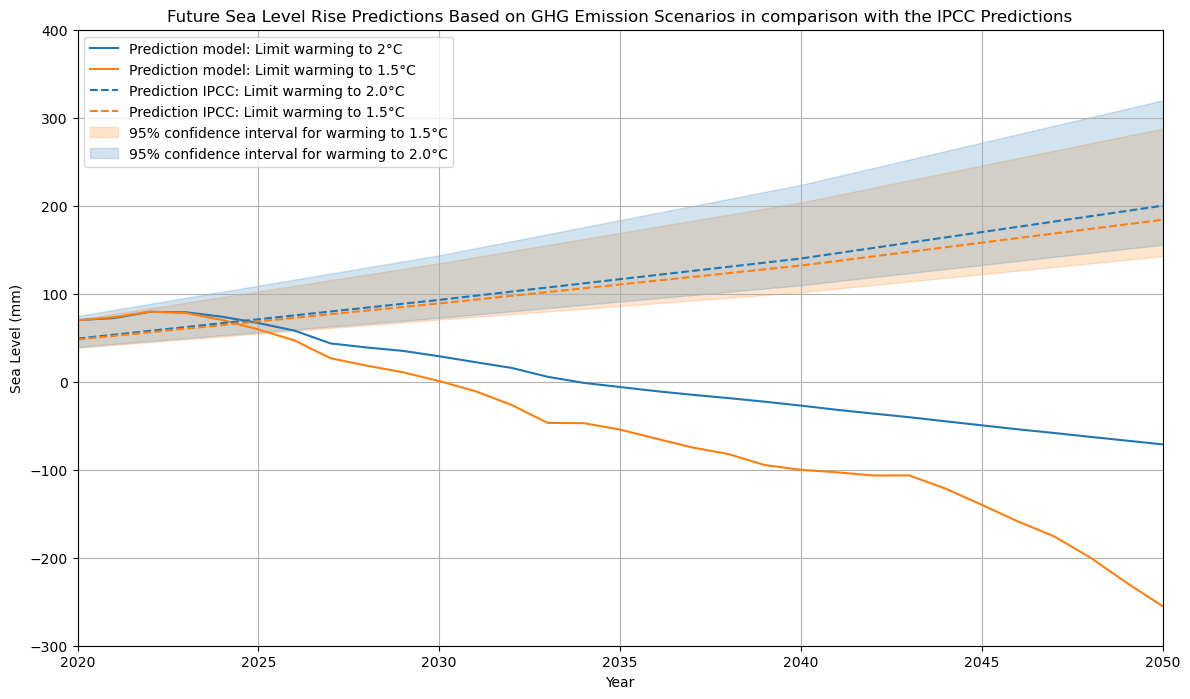

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 8))

# Plot predictions for each scenario
for scenario in ['Limit warming to 2°C', 'Limit warming to 1.5°C']:
    plt.plot(prediction_years, results_denorm[scenario], label=f'Prediction model: {scenario}')

arr_time = df_sealevel_pred.columns[4:].astype(np.float64)
sl_pred_1_5_m = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '1.5') & (df_sealevel_pred['quantile'] == 50)].to_numpy())[4:].astype(np.float64)
sl_pred_2_0_m = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '2.0') & (df_sealevel_pred['quantile'] == 50)].to_numpy())[4:].astype(np.float64)
sl_pred_1_5_uq = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '1.5') & (df_sealevel_pred['quantile'] == 95)].to_numpy())[4:].astype(np.float64)
sl_pred_2_0_uq = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '2.0') & (df_sealevel_pred['quantile'] == 95)].to_numpy())[4:].astype(np.float64)
sl_pred_1_5_lq = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '1.5') & (df_sealevel_pred['quantile'] == 5)].to_numpy())[4:].astype(np.float64)
sl_pred_2_0_lq = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '2.0') & (df_sealevel_pred['quantile'] == 5)].to_numpy())[4:].astype(np.float64)

plt.plot(arr_time,sl_pred_2_0_m, color = 'C0', linestyle='--', label=f'Prediction IPCC: Limit warming to 2.0°C')
plt.plot(arr_time,sl_pred_1_5_m, color = 'C1', linestyle='--', label=f'Prediction IPCC: Limit warming to 1.5°C')

plt.fill_between(arr_time, sl_pred_1_5_lq, sl_pred_1_5_uq, color='C1', alpha=0.2, label=f'95% confidence interval for warming to 1.5°C')
plt.fill_between(arr_time, sl_pred_2_0_lq, sl_pred_2_0_uq, color='C0', alpha=0.2, label=f'95% confidence interval for warming to 2.0°C')

plt.title('Future Sea Level Rise Predictions Based on GHG Emission Scenarios in comparison with the IPCC Predictions')
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
plt.legend()
plt.grid(True)
plt.xlim(2020, 2050)
plt.ylim(-300, 400)
plt.show()

# Create a summary table
summary_data = {'Year': prediction_years}
for scenario, predictions in results_denorm.items():
    summary_data[scenario] = np.squeeze(predictions)

df_summary = pd.DataFrame(summary_data).set_index('Year')

Our model’s predictions consistently underestimate future sea level rise compared to both the IPCC’s 1.5°C and 2.0°C warming scenarios. This underestimation was also observed during the evaluation of our model on the test set, where it systematically predicted lower sea levels than were actually observed. While our model could approximately predict the correct slope during this test, it fails to do so here. The slope of our prediction notably decreases over time, contrasting with the consistently increasing slopes shown in the IPCC projections.

A key factor contributing to this discrepancy is the limited nature of our training data, which consisted exclusively of periods with rising GHG emissions and corresponding rising sea levels. This inherently restricts the model’s ability to accurately predict scenarios involving stabilized or declining emissions, as represented by the IPCC’s 1.5°C scenario. The model essentially learns a relationship between increasing emissions and increasing sea level, and cannot extrapolate beyond that association. A contributing factor to this limitation is the relatively short input timespan used, which hinders the model’s ability to capture the cumulative effects of past emissions.

Furthermore, the IPCC projections benefit from more complex climate models that incorporate a wider range of feedback mechanisms and potential emission pathways, including scenarios with reduced emissions.

Therefore, the observed underestimation is likely a consequence of both the limited scope of our training data and the simplified representation of climate processes compared to the sophisticated models employed by the IPCC.